### Prepare the workstation

In [138]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [139]:
# load the csv file and create a dataframe
reviews1 = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/reviews.csv')  

# Print the DataFrame.
reviews1.head() 

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### Check the data

In [140]:
# View the DataFrame.
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


there are 2000 rows, with the first being headers. That means 1999 records. <br>
The data types of the columns are ok.

In [141]:
# Determine if there are null values
reviews1.isna().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

There are no null values

In [142]:
reviews1.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


# 

# 

In [143]:
# Create a new DataFrame (e.g. df2) containing the remuneration and spending_score columns
df3 = reviews1[['review', 'summary']]

# Print the DataFrame.
df3.head() 

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [144]:
df3.shape

(2000, 2)

In [145]:
# Determine if there are null values
df3.isna().sum()

review     0
summary    0
dtype: int64

# Prepare the data for NLP

In [146]:
# Transform data to lowercase for review column.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [147]:
# Transform data to lowercase for summary column.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [148]:
# Remove punctuation for review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [149]:
# Remove punctuation for summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [150]:
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [151]:
# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()

50

In [170]:
# Drop duplicates in the review column.
df4 = df3.drop_duplicates(subset=['review'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [171]:
df4.shape

(1950, 3)

In [172]:
# Check the number of duplicate values in the review column.
df3.summary.duplicated().sum()

649

In [173]:
# Drop duplicates in the review column.
df4 = df3.drop_duplicates(subset=['summary'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [174]:
df4.shape

(1351, 3)

# Tokenise and create word clouds

In [156]:
# Download nltk's resources to assist with tokenisation.
nltk.download('punkt')

nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [175]:
df4['review_tokens'] = df4['review'].apply(word_tokenize)

In [176]:
df4['summary_tokens'] = df4['summary'].apply(word_tokenize)

In [177]:
df4.head()

,index,review,summary,review_tokens,summary_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [178]:
df4.shape

(1351, 5)

In [160]:
df4['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [179]:
# Define an empty list of tokens for review.
rev_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    rev_tokens = rev_tokens + df4['review_tokens'][i]

In [191]:
# Define an empty list of tokens for summary.
sum_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    sum_tokens = sum_tokens + df4['summary_tokens'][i]

In [184]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for review most common words.
rev_counts = pd.DataFrame(Counter(rev_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

,Frequency
Word,
the,5021
and,2934
to,2843
a,2830
of,2262
i,1888
it,1830
is,1594
this,1551


In [192]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for summary most common words.
sum_counts = pd.DataFrame(Counter(sum_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

,Frequency
Word,
game,268
the,258
a,238
great,237
for,229
to,192
fun,175
and,168
it,139


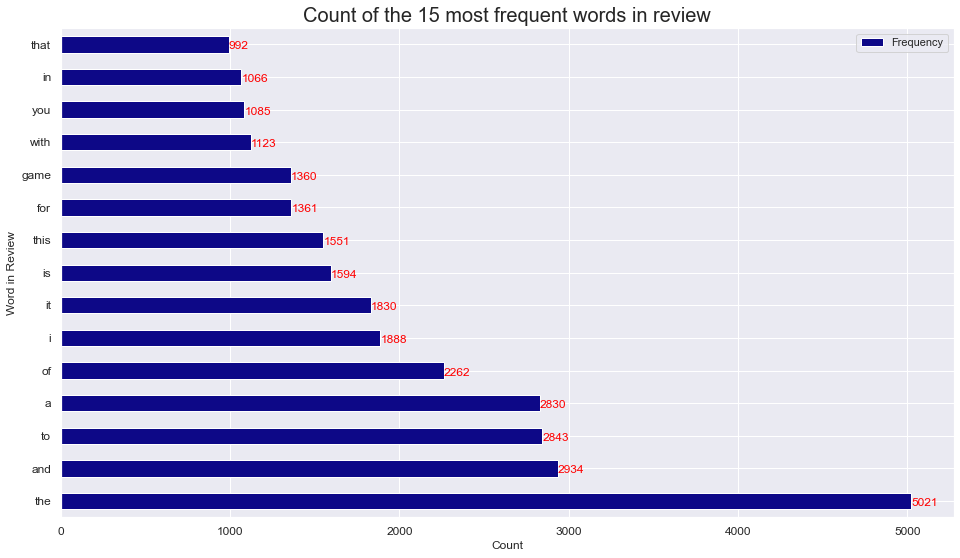

In [186]:
# Set the plot type for review.
ax = rev_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word in Review', fontsize=12)
ax.set_title("Count of the 15 most frequent words in review",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

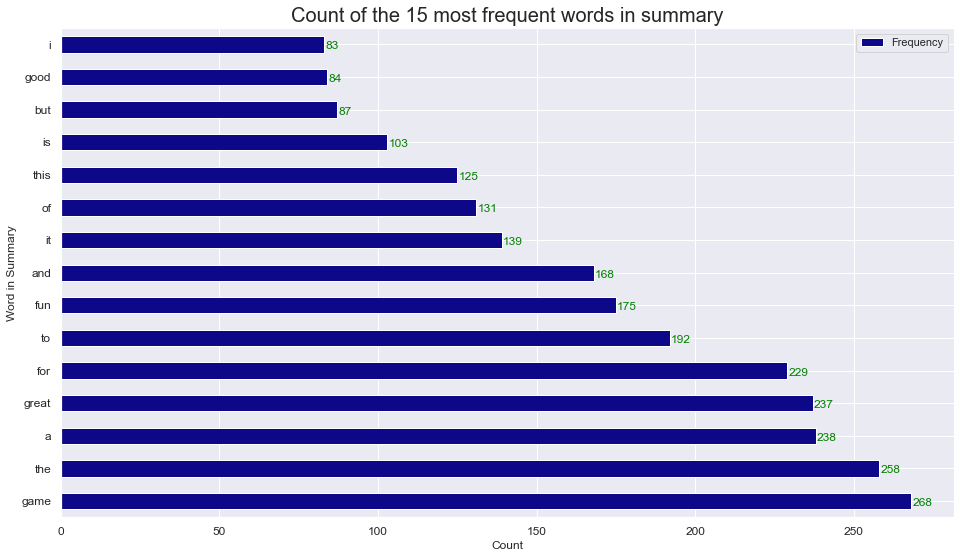

In [193]:
# Set the plot type for summary.
ax = sum_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word in Summary', fontsize=12)
ax.set_title("Count of the 15 most frequent words in summary",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='green')

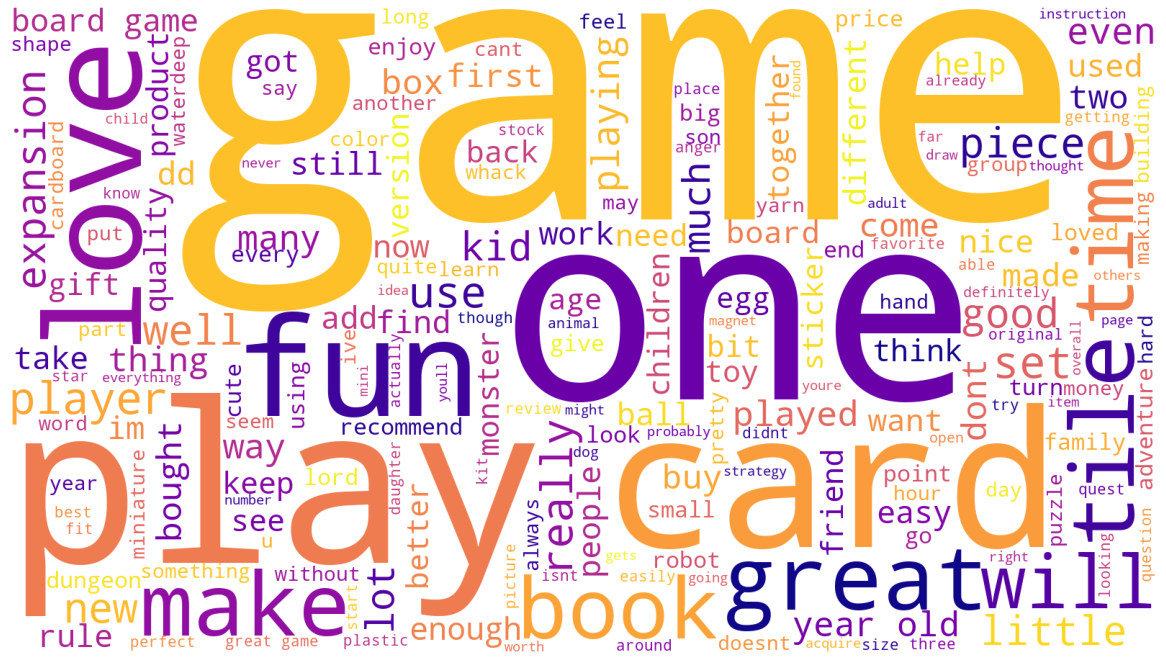

In [189]:
# Define an empty string variable for Review.
rev_tokens_string = ''

for value in rev_tokens:
    # Add each filtered token word to the string.
    rev_tokens_string = rev_tokens_string + value + ' '

# Create a WordCloud for Review.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(rev_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

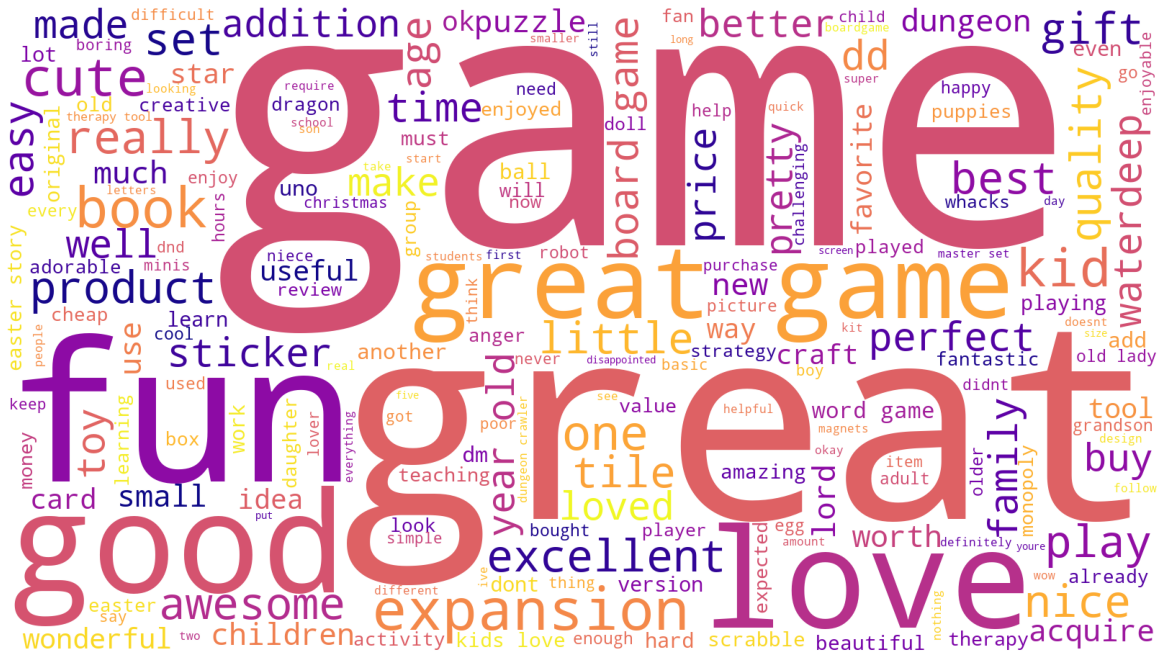

In [194]:
# Define an empty string variable for Summary.
sum_tokens_string = ''

for value in sum_tokens:
    # Add each filtered token word to the string.
    sum_tokens_string = sum_tokens_string + value + ' '

# Create a WordCloud for Summary.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(sum_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Determine the frequency distribution and polarity

In [195]:
# Calculate the frequency distribution for review.
rev_fdist = FreqDist(rev_tokens)

# Preview data.
rev_fdist

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [196]:
# Calculate the frequency distribution for summary.
sum_fdist = FreqDist(sum_tokens)

# Preview data.
sum_fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [197]:
### Review
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in rev_tokens if word.isalnum()]

# Download the stop word list.
nltk.download ('stopwords')

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens1:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
### Summary
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens3 = [word for word in sum_tokens if word.isalnum()]

# Download the stop word list.
nltk.download ('stopwords')

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens4 = [x for x in tokens3 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens4_string = ''

for value in tokens3:
    # Add each filtered token word to the string.
    tokens4_string = tokens4_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


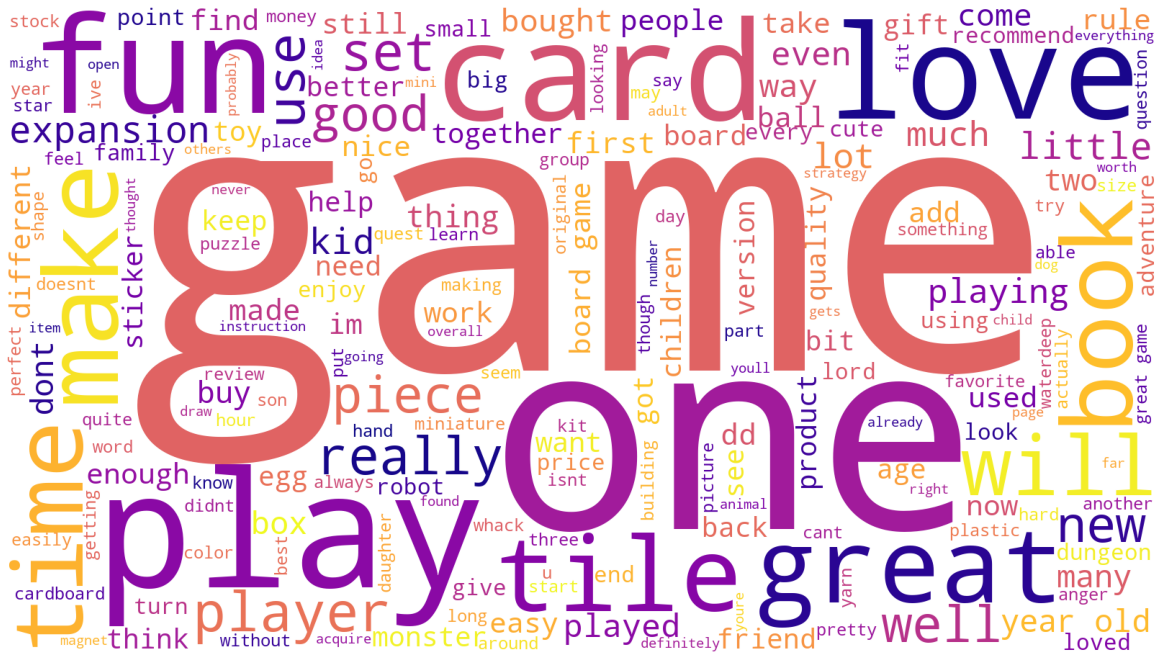

In [199]:
### Review
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

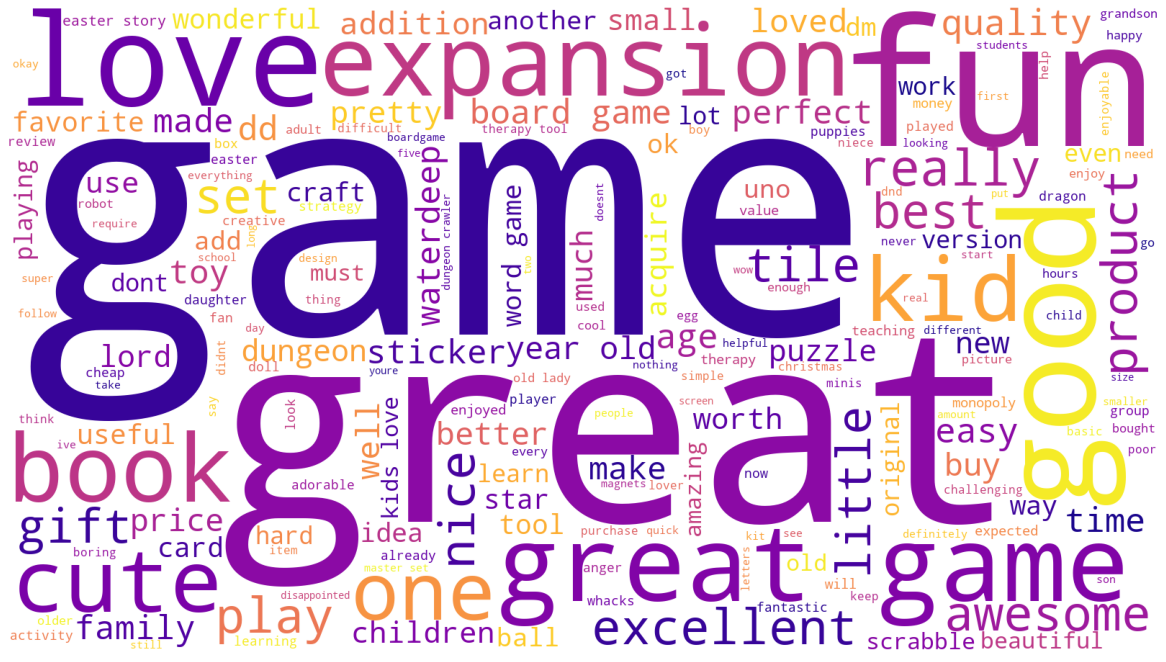

In [200]:
### Summary
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens4_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [201]:
### Review

# View the frequency distribution.
rev_fdist1 = FreqDist(tokens2)

# Preview the data.
rev_fdist1

FreqDist({'game': 1360, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [202]:
### Summary

# View the frequency distribution.
sum_fdist1 = FreqDist(tokens4)

# Preview the data.
sum_fdist1

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [204]:
### Review

# Generate a DataFrame from Counter.
rev_counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

,Frequency
Word,
game,1360
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


In [205]:
### Summary

# Generate a DataFrame from Counter.
sum_counts = pd.DataFrame(Counter(tokens4).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


In [207]:
### Review

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['rev_polarity'] = df4['review'].apply(generate_polarity)

# Preview the result.
df4['rev_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rev_polarity, dtype: float64

In [208]:
### Review

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['rev_subjectivity'] = df4['review'].apply(generate_subjectivity)

# Preview the result.
df4['rev_subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: rev_subjectivity, dtype: float64

In [209]:
### Summary

def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['sum_polarity'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4['sum_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: sum_polarity, dtype: float64

In [210]:
### Summary

# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['sum_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4['sum_subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: sum_subjectivity, dtype: float64

# Review the sentiment polarity

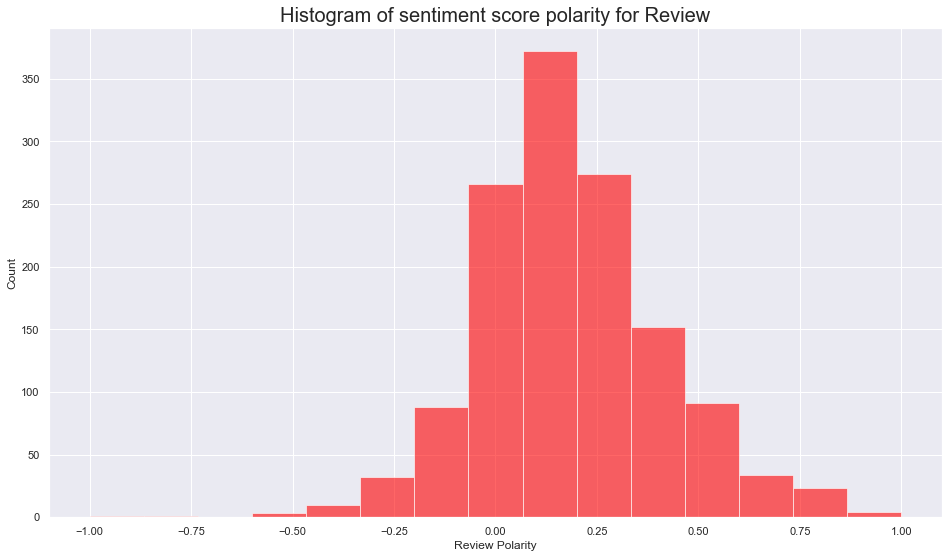

In [211]:
### Review

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Review', fontsize=20)

plt.show()

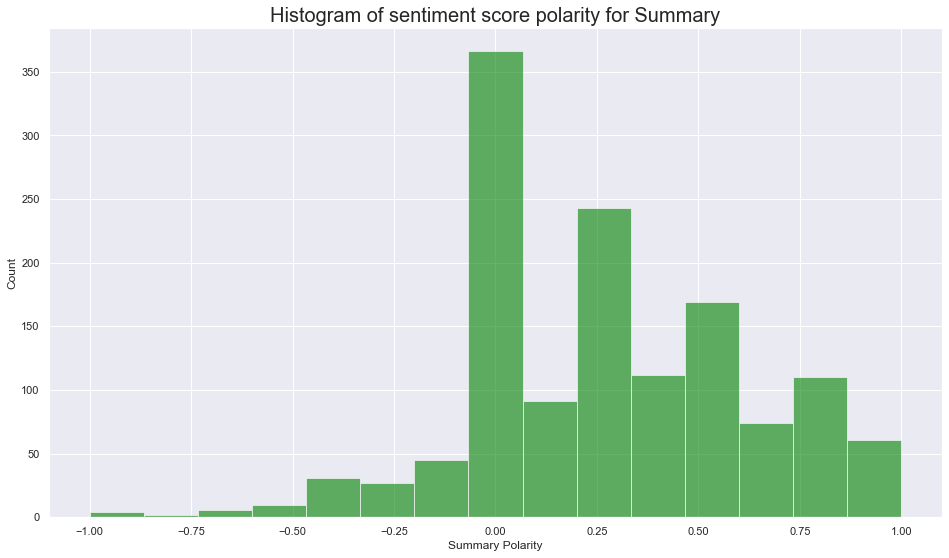

In [212]:
### Summary

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

plt.show()

# Identify and print the top 20 positive reviews and summaries and the top 20 negative reviews and summaries respectively.

In [217]:
### Review

# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'rev_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '600px'})

,review
564,perfect
1082,my daughter loves her stickers awesome seller thank you
1336,perfect for tutoring my grandson in spelling
891,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy
498,great quality very cute and perfect for my toddler
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons
336,great seller happy with my purchase 5 starrrr
439,great easter gift for kids
491,these are great
575,great


In [220]:
### Summary

# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'sum_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '600px'})

,summary
5,best gm screen ever
23,wonderful designs
27,perfect
61,theyre the perfect size to keep in the car or a diaper
107,perfect for preschooler
112,awesome sticker activity for the price
132,awesome book
133,he was very happy with his gift
150,awesome
166,awesome and welldesigned for 9 year olds


In [219]:
### Review

# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'rev_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '600px'})

,review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not
147,incomplete kit very disappointing
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities
355,my son loves playing this game it was recommended by a counselor at school that works with him
714,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon


In [218]:
### Summary

# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'sum_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '600px'})

,summary
17,the worst value ive ever seen
165,boring unless you are a craft person which i am
588,boring
838,before this i hated running any rpg campaign dealing with towns because it
1,another worthless dungeon masters screen from galeforce9
116,disappointed
266,promotes anger instead of teaching calming methods
635,too bad this is not what i was expecting
638,bad qualityall made of paper
144,at age 31 i found these very difficult to make


# 

# 

# -----------------------------------------------------------------------------------------------------------

# 

# 

# Merging the two columns

In [66]:
df3['sum_rev'] = df3['summary'] + " " + df3['review']

In [67]:
# Print the DataFrame.
df3.head() 

,review,summary,sum_rev
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,pretty but also pretty useless nice art nice p...
3,amazing buy bought it as a gift for our new dm...,five stars,five stars amazing buy bought it as a gift for...
4,as my review of gf9s previous screens these we...,money trap,money trap as my review of gf9s previous scree...


In [68]:
# Check the number of duplicate values in the COMMENTS column.
df3.sum_rev.duplicated().sum()

39

In [69]:
# Drop duplicates.
df4 = df3.drop_duplicates(subset=['sum_rev'])

# Preview data.
df4.reset_index(inplace=True)
df4.head()

,index,review,summary,sum_rev
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,pretty but also pretty useless nice art nice p...
3,3,amazing buy bought it as a gift for our new dm...,five stars,five stars amazing buy bought it as a gift for...
4,4,as my review of gf9s previous screens these we...,money trap,money trap as my review of gf9s previous scree...


In [72]:
df4.shape

(1961, 4)

# Tokenise and create word clouds

In [93]:
# Download nltk's resources to assist with tokenisation.
nltk.download('punkt')

nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [83]:
df4['tokens'] = df4['sum_rev'].apply(word_tokenize)

In [85]:
df4['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2    [pretty, but, also, pretty, useless, nice, art...
3    [five, stars, amazing, buy, bought, it, as, a,...
4    [money, trap, as, my, review, of, gf9s, previo...
Name: tokens, dtype: object

In [87]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4['tokens'][i]

In [102]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(all_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
the,5712
and,3401
a,3400
to,3354
of,2627
it,2233
i,2176
game,1990
this,1911


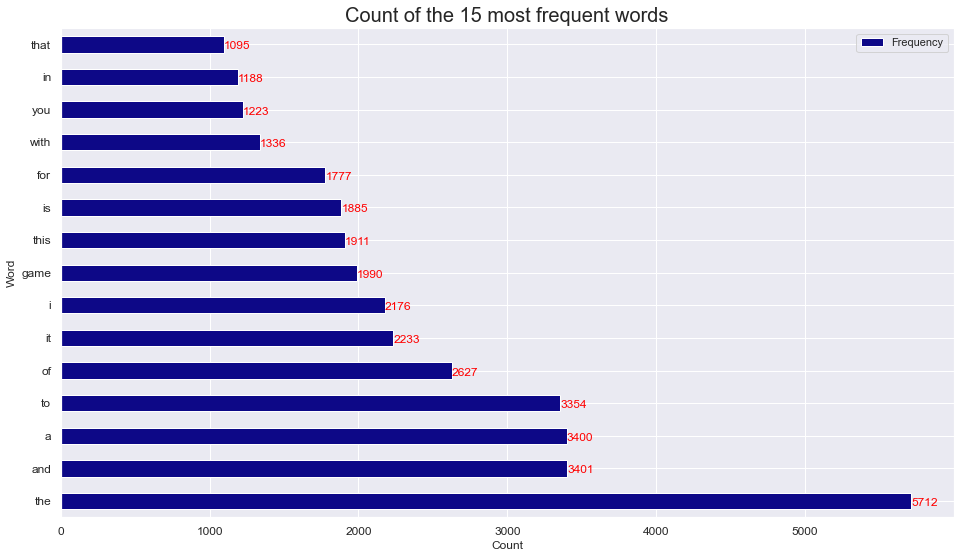

In [103]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [104]:
# Define an empty string variable.
all_tokens_string = ''

for value in all_tokens:
    # Add each filtered token word to the string.
    all_tokens_string = all_tokens_string + value + ' '

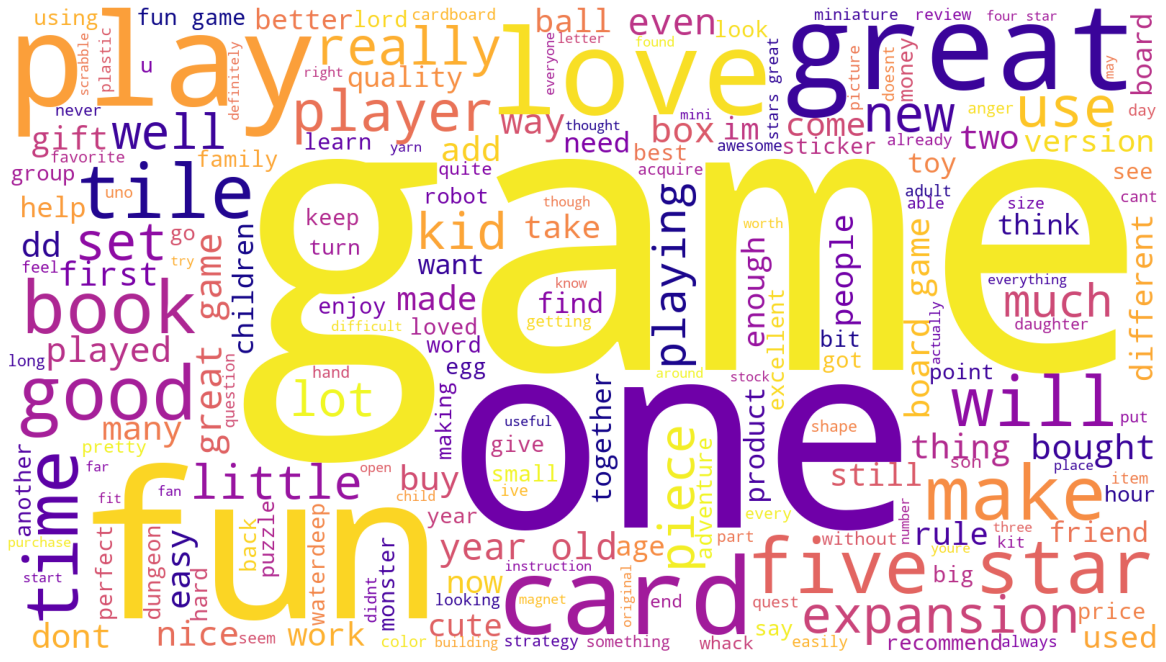

In [105]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

# Determine the frequency distribution and polarity

In [88]:
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

In [89]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in all_tokens if word.isalnum()]

In [90]:
# Download the stop word list.
nltk.download ('stopwords')

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens1:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


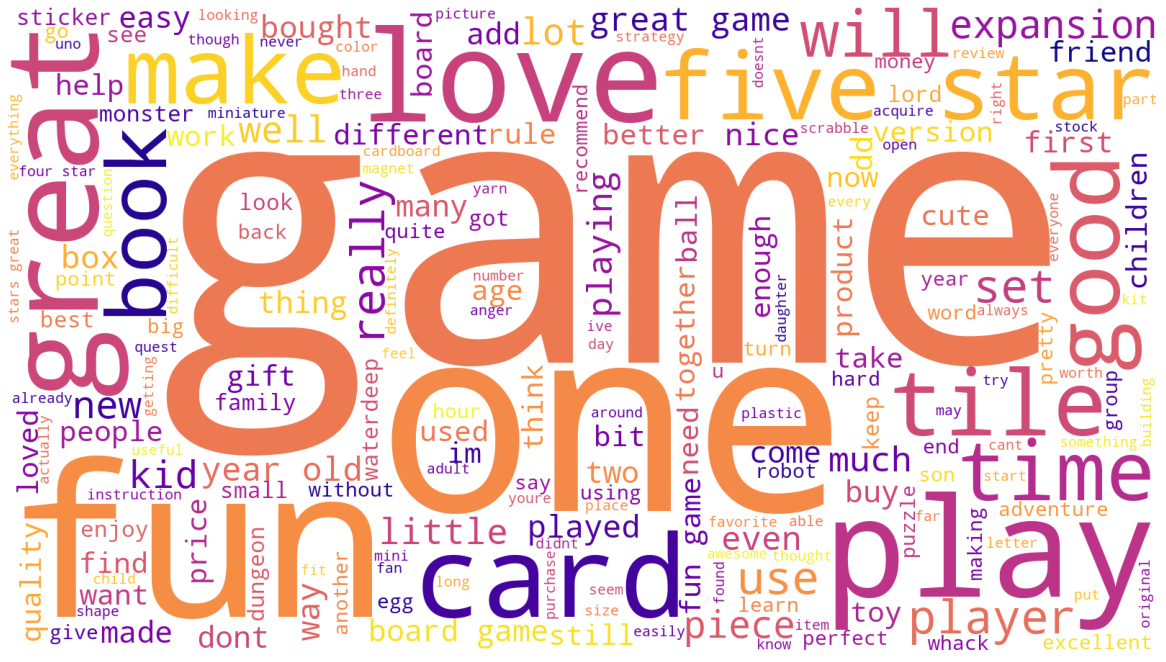

In [91]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

In [92]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

In [94]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1990
great,875
fun,770
one,568
play,528
like,468
stars,464
love,416
good,381


# Review the sentiment polarity

In [110]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['polarity'] = df4['sum_rev'].apply(generate_polarity)

# Preview the result.
df4['polarity'].head()

0   -0.002273
1   -0.003855
2    0.109033
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [111]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['subjectivity'] = df4['sum_rev'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity'].head()

0    0.488636
1    0.464739
2    0.450189
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

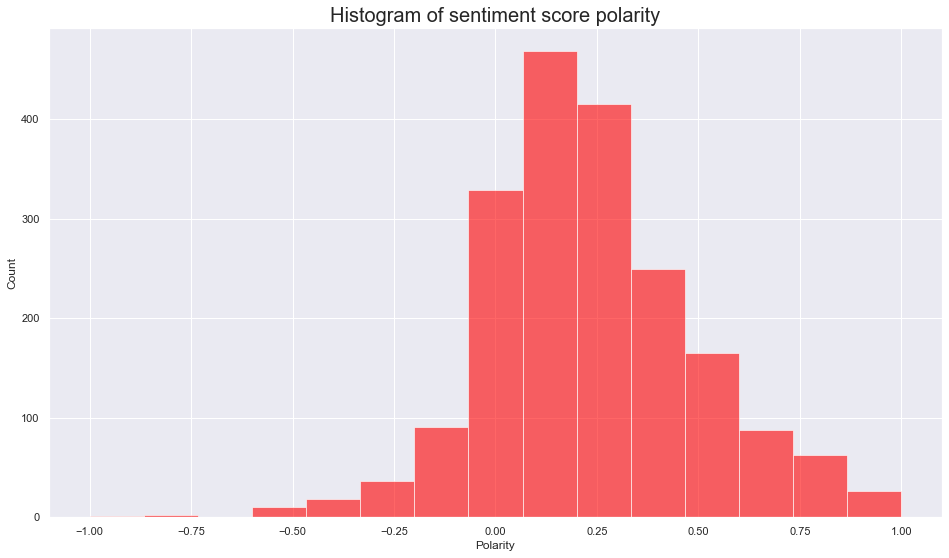

In [113]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

# Identify and print the top 20 positive reviews and summaries and the top 20 negative reviews and summaries respectively.

In [119]:
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['sum_rev', 'review', 'summary']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['sum_rev'], **{'width': '400px'})

,sum_rev,review,summary
7,five stars came in perfect condition,came in perfect condition,five stars
164,five stars awesome book,awesome book,five stars
193,five stars awesome gift,awesome gift,five stars
489,five stars excellent activity for teaching selfmanagement skills,excellent activity for teaching selfmanagement skills,five stars
517,five stars perfect just what i ordered,perfect just what i ordered,five stars
583,five stars wonderful product,wonderful product,five stars
601,five stars delightful product,delightful product,five stars
613,five stars wonderful for my grandson to learn the resurrection story,wonderful for my grandson to learn the resurrection story,five stars
923,five stars awesome,awesome,five stars
1119,five stars awesome set,awesome set,five stars


In [120]:
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['sum_rev', 'review', 'summary']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['sum_rev'], **{'width': '400px'})

,sum_rev,review,summary
207,boring unless you are a craft person which i am booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am
181,incomplete kit incomplete kit very disappointing,incomplete kit very disappointing,incomplete kit
623,disappointed eggs split and were unusable,eggs split and were unusable,disappointed
1773,disappointing im sorry i just find this product to be boring and to be frank juvenile,im sorry i just find this product to be boring and to be frank juvenile,disappointing
362,anger control game one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,anger control game
116,stickers i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,stickers
226,two stars this was a gift for my daughter i found it difficult to use,this was a gift for my daughter i found it difficult to use,two stars
229,three stars i found the directions difficult,i found the directions difficult,three stars
289,two stars instructions are complicated to follow,instructions are complicated to follow,two stars
300,three stars difficult,difficult,three stars
